## Librairy imports and helper function

Importing python librairies used in this notebook ...

In [2]:
# Import librairies
import os
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import matplotlib as mpt
from cycler import cycler

# from collections import KeysView

mpt.rcParams['lines.linewidth'] = 1.4
mpt.rcParams['font.size'] = 12
mpt.rcParams['axes.prop_cycle'] = cycler(color=['r', 'g', 'b', 'y'])
plt.style.use('default')

A helper function used to keep figures layouts consistent and avoid codes repetitions

In [130]:
# Function set_my_layout

def set_my_layout(ax: plt.Axes, xlabel: str, ylabel: str, title: str=None, legend_loc=(0.01,0.01), withlegend=False, legends=None) -> plt.Axes:
    """Sets my personal layout used in all official figures

    Args:
        ax (plt.Axes): the pyplot axes
        xlabel (str): x-axis label
        ylabel (str): y-axis label
        title (str, optional): title of the figure. Defaults to None.
        legend_loc (tuple, optional): location of the legend box in 2D coordinates. Defaults to (0.01,0.01).
        withlegend (bool, optional): whether to put the legend box. Defaults to False.
        legends (_type_, optional): legends list. Defaults to None.

    Returns:
        plt.Axes: the pyplot axes (self return)
    """
    if title != None:
        ax.set_title(title, fontdict={'color': 'black', 'size': 14})
    ax.set_xlabel(xlabel, fontdict={'color': 'black', 'size': 20})
    ax.set_ylabel(ylabel, fontdict={'color': 'black', 'size': 20})
    ax.tick_params(axis='y', colors='black', labelsize=18)
    ax.tick_params(axis='x', colors='black', labelsize=18)
    if withlegend:
        ax.legend(legends, prop={'size': 16}, loc=legend_loc)
    # ax.xaxis.major.formatter._useMathText = True
    return ax

## ML architectures performances

Loading ML architectures performances from pre-saved .csv files into pandas tables

In [62]:
# Load CNNs and RNNs performances into pandas dataframe

# .csv files contain the ML performances (MAE-test and Train-loss) over the selected clusters (with their types, sizes, etc.)
file_path_rnn_v1 = os.path.join('.', 'ARTICLE_trained_mls_data', 'rnn_v1_performances.csv')
file_path_rnn_v2 = os.path.join('.', 'ARTICLE_trained_mls_data', 'rnn_v2_performances.csv')
file_path_cnn_v1 = os.path.join('.', 'ARTICLE_trained_mls_data', 'cnn_v1_performances.csv')
file_path_cnn_v2 = os.path.join('.', 'ARTICLE_trained_mls_data', 'cnn_v2_performances.csv')
file_path_mlps = os.path.join('.', 'ARTICLE_trained_mls_data', 'ffnn_performances.csv')

rnns_version_1_pd = pd.read_csv(file_path_rnn_v1, sep=",", encoding="utf-8")
rnns_version_2_pd = pd.read_csv(file_path_rnn_v2, sep=",", encoding="utf-8")
cnns_version_1_pd = pd.read_csv(file_path_cnn_v1, sep=",", encoding="utf-8")
cnns_version_2_pd = pd.read_csv(file_path_cnn_v2, sep=",", encoding="utf-8")
mlp_models_performances_df = pd.read_csv(file_path_mlps, sep=",", encoding="utf-8")

Measuring and comparing the different versions CNN and RNN architectures performances with and without L1(0.0001) regularizer: due to their intense computational training costs, these models have been trained on Jean Zay GPUs servers 

In [63]:
# Averaging the MAEs on test sets over the selected clusters
 
bases_rnn_1s = []
regs_rnn_1s = []

bases_rnn_2s = []
regs_rnn_2s = []

bases_cnn_1s = []
regs_cnn_1s = []

bases_cnn_2s = []
regs_cnn_2s = []

for (cluster_key, cluster_dhn, cluster_set), df_ in rnns_version_1_pd[rnns_version_1_pd['is inverted flux'] == 0].groupby(by=['cluster key', 'cluster dhn', 'cluster set']):
    rnns_version_2_pd_s = rnns_version_2_pd[(rnns_version_2_pd['cluster dhn'] == cluster_dhn) & (rnns_version_2_pd['cluster key'] == cluster_key) & (rnns_version_2_pd['cluster set'] == cluster_set)]
    cnns_version_1_pd_s = cnns_version_1_pd[(cnns_version_1_pd['cluster dhn'] == cluster_dhn) & (cnns_version_1_pd['cluster key'] == cluster_key) & (cnns_version_1_pd['cluster set'] == cluster_set)]
    cnns_version_2_pd_s = cnns_version_2_pd[(cnns_version_2_pd['cluster dhn'] == cluster_dhn) & (cnns_version_2_pd['cluster key'] == cluster_key) & (cnns_version_2_pd['cluster set'] == cluster_set)]
    
    # Note that we compare only joinly trained clusters
    if len(df_) >= 2 and len(rnns_version_2_pd_s) >= 2 and len(cnns_version_1_pd_s) >= 2 and len(cnns_version_2_pd_s) >= 2:
        bases_rnn_1s.append(df_[df_['version'] == 1]['mae'].iloc[0])
        regs_rnn_1s.append(df_[df_['version'] == 5]['mae'].iloc[0])
        
        bases_rnn_2s.append(rnns_version_2_pd_s[rnns_version_2_pd_s['version'] == 8]['mae'].iloc[0])
        regs_rnn_2s.append(rnns_version_2_pd_s[rnns_version_2_pd_s['version'] == 10]['mae'].iloc[0])
        
        bases_cnn_1s.append(cnns_version_1_pd_s[cnns_version_1_pd_s['version'] == 7]['mae'].iloc[0])
        regs_cnn_1s.append(cnns_version_1_pd_s[cnns_version_1_pd_s['version'] == 8]['mae'].iloc[0])
        
        bases_cnn_2s.append(cnns_version_2_pd_s[cnns_version_2_pd_s['version'] == 10]['mae'].iloc[0])
        regs_cnn_2s.append(cnns_version_2_pd_s[cnns_version_2_pd_s['version'] == 11]['mae'].iloc[0])
        
print(f'RNN v1s ---')
print(f'--> base : mae = {np.mean(bases_rnn_1s):.4f}, std = {np.std(bases_rnn_1s):.4f}, median = {np.median(bases_rnn_1s):.4f}')
print(f'--> l1-reg : mae = {np.mean(regs_rnn_1s):.4f}, std = {np.std(regs_rnn_1s):.4f}, median = {np.median(regs_rnn_1s):.4f}')
print(f'RNN v2s ---')
print(f'--> base : mae = {np.mean(bases_rnn_2s):.4f}, std = {np.std(bases_rnn_2s):.4f}, median = {np.median(bases_rnn_2s):.4f}')
print(f'--> l1-reg : mae = {np.mean(regs_rnn_2s):.4f}, std = {np.std(regs_rnn_2s):.4f}, median = {np.median(regs_rnn_2s):.4f}')
print(f'CNN v1s ---')
print(f'--> base : mae = {np.mean(bases_cnn_1s):.4f}, std = {np.std(bases_cnn_1s):.4f}, median = {np.median(bases_cnn_1s):.4f}')
print(f'--> l1-reg : mae = {np.mean(regs_cnn_1s):.4f}, std = {np.std(regs_cnn_1s):.4f}, median = {np.median(regs_cnn_1s):.4f}')
print(f'CNN v2s ---')
print(f'--> base : mae = {np.mean(bases_cnn_2s):.4f}, std = {np.std(bases_cnn_2s):.4f}, median = {np.median(bases_cnn_2s):.4f}')
print(f'--> l1-reg : mae = {np.mean(regs_cnn_2s):.4f}, std = {np.std(regs_cnn_2s):.4f}, median = {np.median(regs_cnn_2s):.4f}')

RNN v1s ---
--> base : mae = 0.1721, std = 0.4020, median = 0.0907
--> l1-reg : mae = 0.4603, std = 0.9188, median = 0.1550
RNN v2s ---
--> base : mae = 0.1889, std = 0.5294, median = 0.0855
--> l1-reg : mae = 0.2990, std = 0.6303, median = 0.1584
CNN v1s ---
--> base : mae = 0.1321, std = 0.0761, median = 0.1136
--> l1-reg : mae = 0.2540, std = 0.6498, median = 0.1343
CNN v2s ---
--> base : mae = 0.1145, std = 0.1244, median = 0.0878
--> l1-reg : mae = 0.1980, std = 0.6372, median = 0.1024


FFNN architectures performances with and without L1(0.0001) regularizer during the training: models trained locally for several clusters 

In [64]:
print('FFNN models performances loaded !! --------')
print('MAE ----')
print(mlp_models_performances_df.mean(skipna=True, numeric_only=True)[['mlp_v1_mae', 'mlp_v1_reg_mae','mlp_v2_mae', 'mlp_v2_reg_mae']])
print('STD ----')
print(mlp_models_performances_df.std(skipna=True, numeric_only=True)[['mlp_v1_mae', 'mlp_v1_reg_mae','mlp_v2_mae', 'mlp_v2_reg_mae']])
print('MEDIAN ----')
print(mlp_models_performances_df.median(skipna=True, numeric_only=True)[['mlp_v1_mae', 'mlp_v1_reg_mae','mlp_v2_mae', 'mlp_v2_reg_mae']])

FFNN models performances loaded !! --------
MAE ----
mlp_v1_mae        1.102112
mlp_v1_reg_mae    1.537615
mlp_v2_mae        0.239237
mlp_v2_reg_mae    0.941393
dtype: float64
STD ----
mlp_v1_mae        2.197402
mlp_v1_reg_mae    1.990706
mlp_v2_mae        0.206157
mlp_v2_reg_mae    1.286343
dtype: float64
MEDIAN ----
mlp_v1_mae        0.181350
mlp_v1_reg_mae    0.421488
mlp_v2_mae        0.151483
mlp_v2_reg_mae    0.188122
dtype: float64


Using boxplots, we visually compare the distribution of the considered ML architectures performances to learn the selected clusters, measured in MAE on their respective test sets.

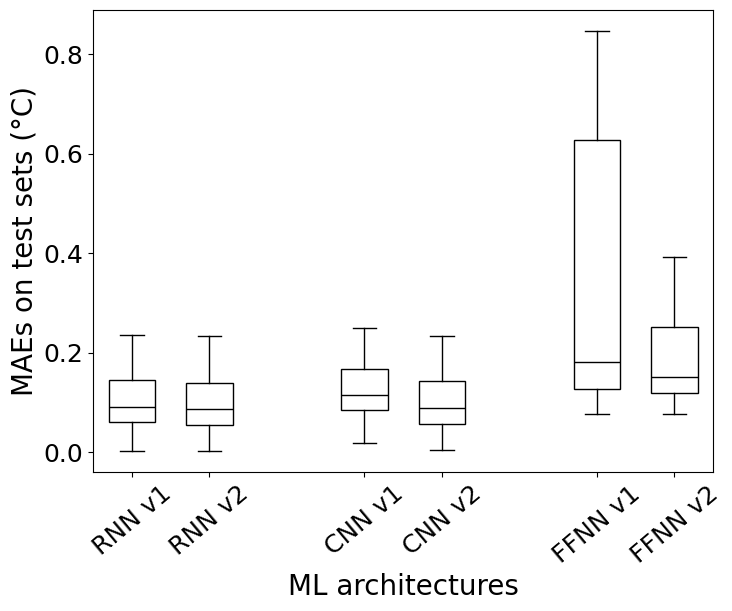

In [65]:
# Boxplots comparison between the 3 ML architectures

fig, ax = plt.subplots(figsize=(8,6))

box = ax.boxplot(bases_rnn_1s, positions=[0],
                 patch_artist=True,
                        widths=0.6,
                        meanline=False,
                        showfliers=False,
                        boxprops={'color':'black', 'facecolor':'white'}, 
                        whiskerprops={'color': 'black'},
                        capprops={'color': 'black'},
                        medianprops={'color': 'black'},)
box = ax.boxplot(bases_rnn_2s, positions=[1],
                 patch_artist=True,
                        widths=0.6,
                        showfliers=False,
                         meanline=False,
                        boxprops={'color':'black', 'facecolor':'white'}, 
                        whiskerprops={'color': 'black'},
                        capprops={'color': 'black'},
                        medianprops={'color': 'black'},)


box = ax.boxplot(bases_cnn_1s, positions=[3],
                 patch_artist=True,
                        widths=0.6,
                        showfliers=False,
                        boxprops={'color':'black', 'facecolor':'white'}, 
                        whiskerprops={'color': 'black'},
                        capprops={'color': 'black'},
                        medianprops={'color': 'black'},)
box = ax.boxplot(bases_cnn_2s, positions=[4],
                 patch_artist=True,
                        widths=0.6,
                        showfliers=False,
                        boxprops={'color':'black', 'facecolor':'white'}, 
                        whiskerprops={'color': 'black'},
                        capprops={'color': 'black'},
                        medianprops={'color': 'black'},)

box = ax.boxplot(mlp_models_performances_df['mlp_v1_mae'], positions=[6],
                 patch_artist=True,
                        widths=0.6,
                        showfliers=False,
                        boxprops={'color':'black', 'facecolor':'white'}, 
                        whiskerprops={'color': 'black'},
                        capprops={'color': 'black'},
                        medianprops={'color': 'black'},)
box = ax.boxplot(mlp_models_performances_df['mlp_v2_mae'], positions=[7],
                 patch_artist=True,
                        widths=0.6,
                        showfliers=False,
                        boxprops={'color':'black', 'facecolor':'white'}, 
                        whiskerprops={'color': 'black'},
                        capprops={'color': 'black'},
                        medianprops={'color': 'black'},)

set_my_layout(ax=ax, xlabel='ML architectures', ylabel='MAEs on test sets (°C)')

ax.set_xticklabels(['RNN v1', 'RNN v2', 'CNN v1', 'CNN v2', 'FFNN v1', 'FFNN v2'])

plt.xticks(rotation=40)
fig.savefig(os.path.join('.', 'ARTICLE_images_plots', 'ml_architectures_boxplots.svg'))
plt.show()

To illustrate the effects of the L1-regularizer, we show the training/validation losses decreases over the training loop. 

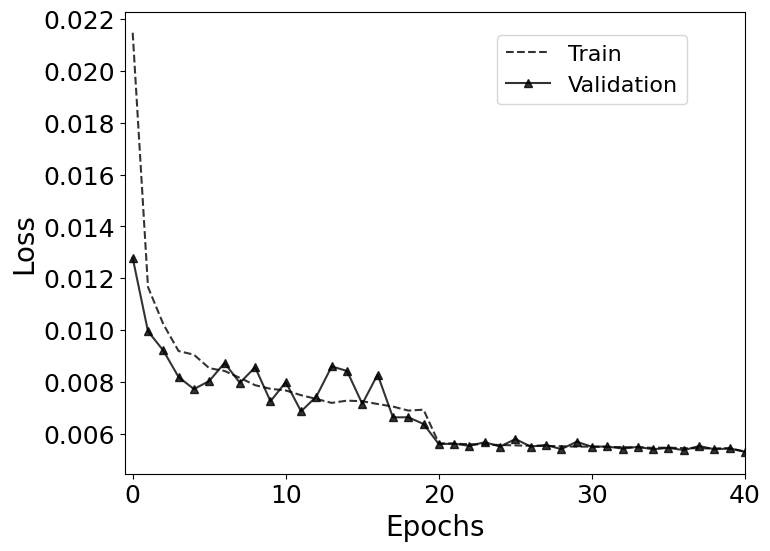

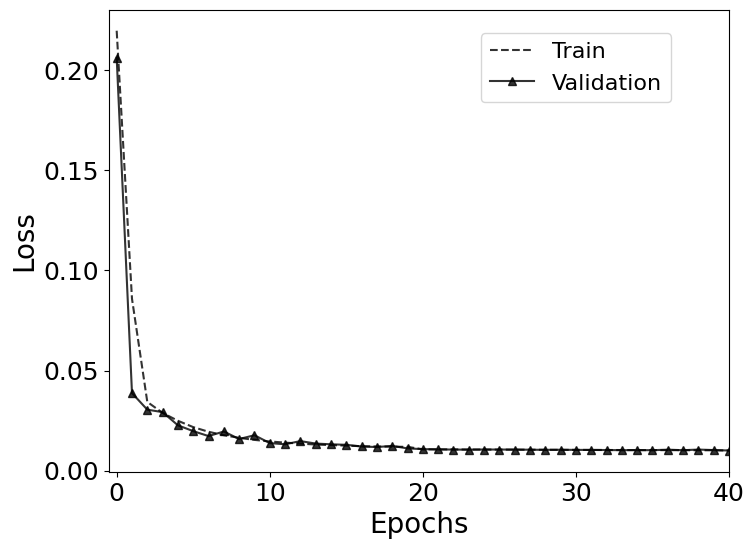

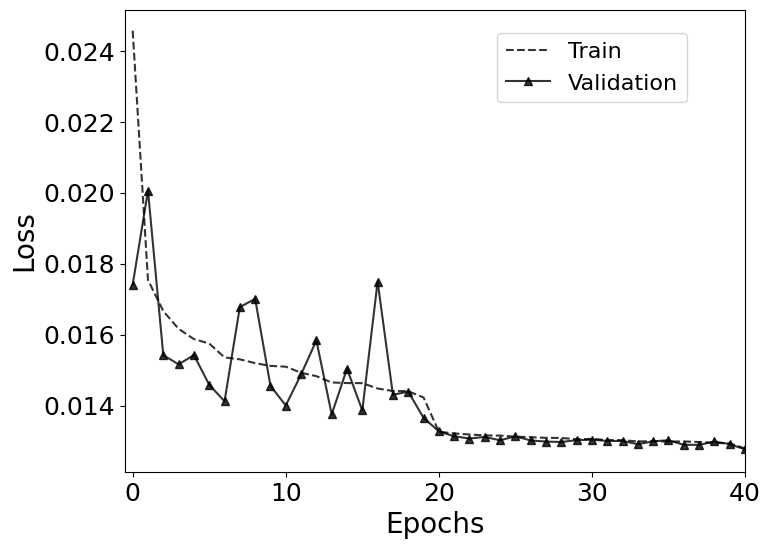

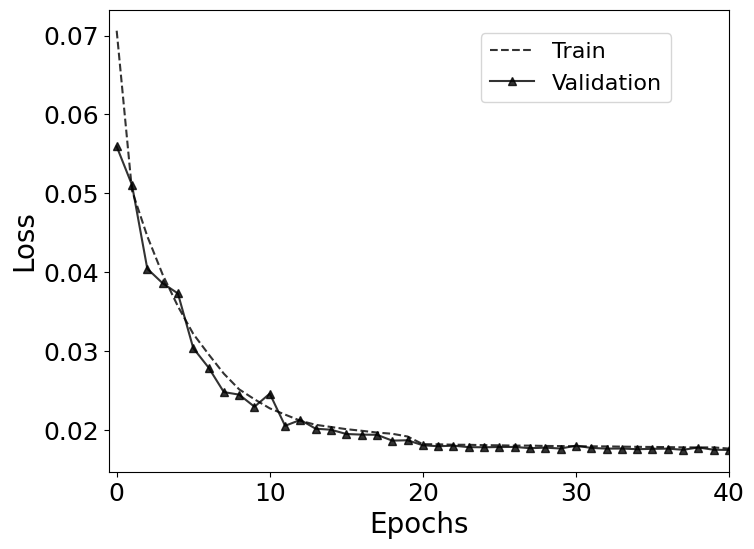

In [67]:
# Illustration of training processes between L1-regularizer and no + identification of bast RNN v1 versions

regs = []
bases = []

count = 0
for (cluster_key, cluster_dhn, cluster_set), df_ in cnns_version_2_pd.groupby(by=['cluster key', 'cluster dhn', 'cluster set']):
    if len(df_) >= 2:
        folder_excel_files = os.path.join('ARTICLE_trained_mls_data', f'Network_{cluster_dhn}', f'copied_cluster_set_{cluster_set}_files', f'cluster_{cluster_key}_folder')
        rnn_v1_ = pd.read_csv(os.path.join(folder_excel_files, f'new_cnn_model_v10_history.csv'))
        rnn_v1_reg = pd.read_csv(os.path.join(folder_excel_files, 'new_cnn_model_v11_history.csv'))
        
        bases.append(df_[df_['version'] == 10]['mae'].iloc[0])
        regs.append(df_[df_['version'] == 11]['mae'].iloc[0])
        
        if count < 2:
            fig, ax = plt.subplots(figsize=(8,6))
            ax.plot(rnn_v1_['loss'], '--', c='black', alpha=0.8)
            ax.plot(rnn_v1_['val_loss'], '-^', c='black', alpha=0.8)
            ax.set_xlim([-0.5,40])
            set_my_layout(ax=ax, xlabel='Epochs', ylabel='Loss', legends=['Train', 'Validation'], withlegend=True, legend_loc=[0.6,0.8])
            plt.savefig(os.path.join('.', 'ARTICLE_images_plots', 'given_cluster_history_rnn.svg'))
            plt.show()
            
            
            fig, ax = plt.subplots(figsize=(8,6))
            ax.plot(rnn_v1_reg['loss'], '--', c='black', alpha=0.8)
            ax.plot(rnn_v1_reg['val_loss'], '-^', c='black', alpha=0.8)
            ax.set_xlim([-0.5,40])
            set_my_layout(ax=ax, xlabel='Epochs', ylabel='Loss', legends=['Train', 'Validation'], withlegend=True, legend_loc=[0.6,0.8])
            plt.savefig(os.path.join('.', 'ARTICLE_images_plots', 'given_cluster_history_rnn_with_l1reg.svg'))
            plt.show()
        
        count += 1

According to our experiments, the training the ML architectures without the used L1-regularizer gives the best generalization results (MAE low).

Besides, best architectures are CNN and RNN and, more precisely, the versions 1 and 2 respectively.

In [11]:
# Identification of best ML versions

# Note that the version numbers are not linked to version the paper but versions of the test ML architectures from Jean Zay training.
best_rnns_version_1_pd = rnns_version_1_pd[rnns_version_1_pd['version']==1] # Best RNN v1 without regularizer
best_rnns_version_2_pd = rnns_version_2_pd[rnns_version_2_pd['version']==7] # Best RNN v2 without regularizer
best_cnns_version_1_pd = cnns_version_1_pd[cnns_version_1_pd['version']==8] # Best CNN v1 without regularizer
best_cnns_version_2_pd = cnns_version_2_pd[cnns_version_2_pd['version']==10] # Best CNN v2 without regularizer

Using boxplots, we visualize the distribution of MAEs of CNN v2 and RNN v1 over the selected clusters.

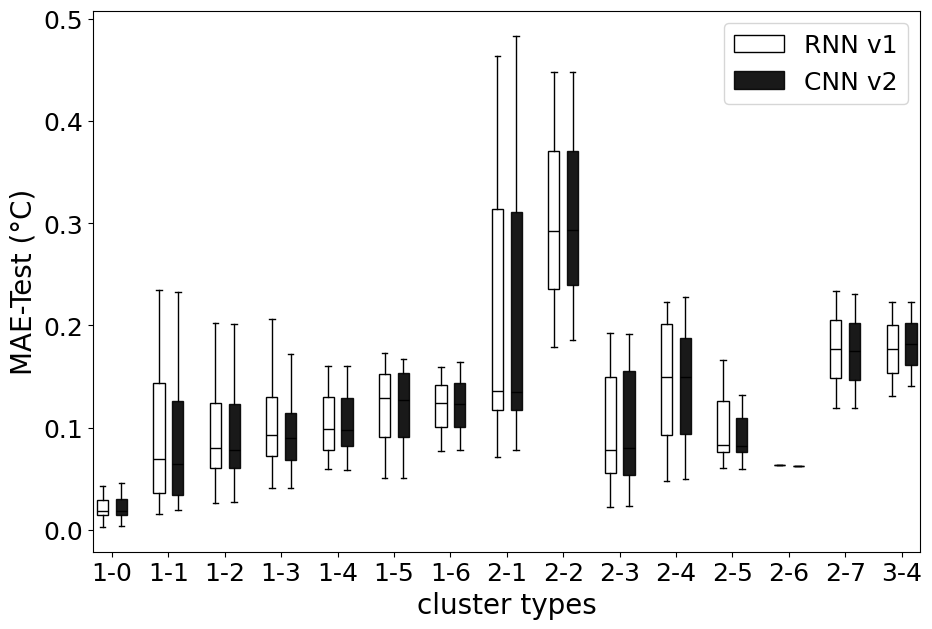

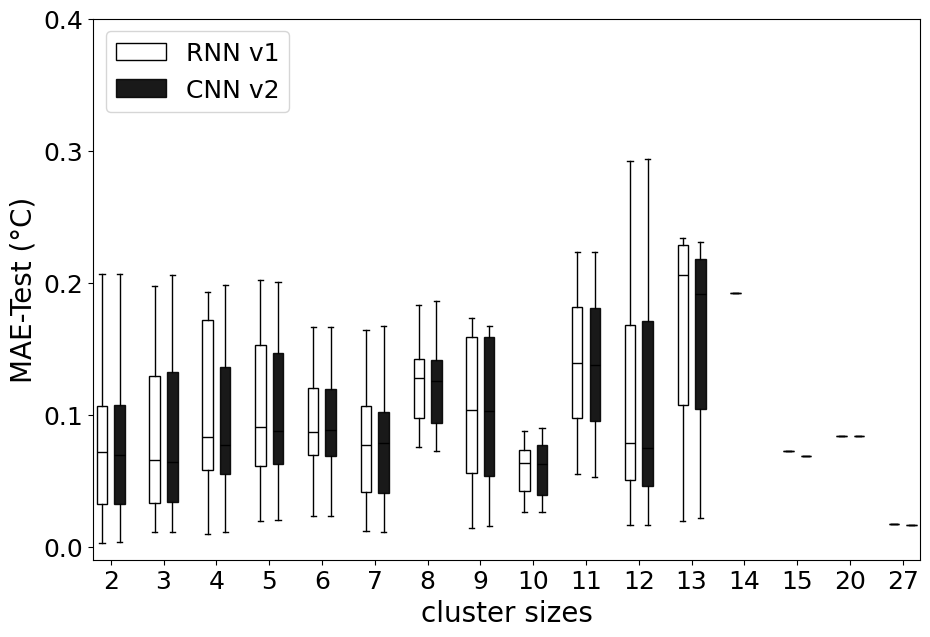

In [68]:
# Box plots

positions =0
types = []

fig, ax = plt.subplots(figsize=(9,6))
fig.tight_layout()

for type_key, group_df in best_cnns_version_2_pd.sort_values(by=['cluster type']).groupby(by=['cluster type']):
    if len(group_df) > 0:
        
        grouped_best_rnns_version_1 = best_rnns_version_1_pd[best_rnns_version_1_pd['cluster type'] == type_key[0]]
        # bx = ax.boxplot(np.log(group_df[['mae_cnn','mae_rnn','mae_mlp']].to_numpy().astype(float)), positions=[positions, positions+1, positions+2])
        boxes = ax.boxplot(grouped_best_rnns_version_1[['mae']].to_numpy().astype(float), positions=[positions],
                        patch_artist=True,
                        widths=0.6,
                        showfliers=False,
                        boxprops={'color':'black', 'facecolor':'white'}, 
                        whiskerprops={'color': 'black'},
                        capprops={'color': 'black'},
                        medianprops={'color': 'black'},)
        
        boxes_ = ax.boxplot(group_df[['mae']].to_numpy().astype(float), positions=[positions+1],
                        patch_artist=True,
                        widths=0.6,
                        showfliers=False,
                        boxprops={'color':'black', 'facecolor':'black', 'alpha':0.9},
                        flierprops={'color': 'black'},
                        capprops={'color': 'black'},
                        whiskerprops={'color': 'black'},
                        medianprops={'color': 'black'})

        positions += 3
        types.append(type_key[0])

# print(types)
list_ticks = np.array(ax.get_xticks())
ax.set_xticks(np.arange(0.5,list_ticks[-1],3))
ax.set_xticklabels(types)

set_my_layout(ax=ax, xlabel='cluster types', ylabel='MAE-Test (°C)')

ax.legend([boxes["boxes"][0], boxes_["boxes"][0]], ['RNN v1', 'CNN v2'], loc='upper right',
          prop={'size': 18})

fig.savefig(os.path.join('.', 'ARTICLE_images_plots', 'rnnv1_cnnv2_performances_over_cluster_types.svg'))
plt.show()

positions =0
types = []

fig, ax = plt.subplots(figsize=(9,6))
fig.tight_layout()

for type_key, group_df in best_cnns_version_2_pd.sort_values(by=['cluster size']).groupby(by=['cluster size']):
    if len(group_df) > 0:
        
        grouped_best_rnns_version_1 = best_rnns_version_1_pd[best_rnns_version_1_pd['cluster size'] == type_key[0]]
        # bx = ax.boxplot(np.log(group_df[['mae_cnn','mae_rnn','mae_mlp']].to_numpy().astype(float)), positions=[positions, positions+1, positions+2])
        boxes = ax.boxplot(grouped_best_rnns_version_1[['mae']].to_numpy().astype(float), positions=[positions],
                        patch_artist=True,
                        widths=0.6,
                        showfliers=False,
                        boxprops={'color':'black', 'facecolor':'white'}, 
                        whiskerprops={'color': 'black'},
                        capprops={'color': 'black'},
                        medianprops={'color': 'black'},)
        
        boxes_ = ax.boxplot(group_df[['mae']].to_numpy().astype(float), positions=[positions+1],
                        patch_artist=True,
                        widths=0.6,
                        showfliers=False,
                        boxprops={'color':'black', 'facecolor':'black', 'alpha':0.9},
                        flierprops={'color': 'black'},
                        capprops={'color': 'black'},
                        whiskerprops={'color': 'black'},
                        medianprops={'color': 'black'})

        positions += 3
        types.append(type_key[0])

list_ticks = np.array(ax.get_xticks())
ax.set_xticks(np.arange(0.5,list_ticks[-1],3))
ax.set_xticklabels(types)

set_my_layout(ax=ax, xlabel='cluster sizes', ylabel='MAE-Test (°C)')

ax.legend([boxes["boxes"][0], boxes_["boxes"][0]], ['RNN v1', 'CNN v2'], loc='upper left',
          prop={'size': 18})

# ax.set_ylim([-0.01,0.4]) # Un CNN v2 a mal convergé
ax.set_yticks(np.arange(0, 0.45, 0.1))
ax.set_ylim([-0.01,0.4]) # Un CNN v2 a mal convergé

fig.savefig(os.path.join('.', 'ARTICLE_images_plots', 'rnnv1_cnnv2_performances_over_cluster_size.svg'))
plt.show()

Showing the performances of some specific clusters used in the hybrid simulation

In [129]:
print('RNN v1 performances')
print(best_rnns_version_1_pd[(best_rnns_version_1_pd['cluster dhn'] == 1) & (best_rnns_version_1_pd['cluster set'] == 1) 
                       & (best_rnns_version_1_pd['cluster key'].isin(['a', 'b', 'd', 'e', 'f']))][['cluster key', 'mae']])

print('CNN v2 performances')
print(best_cnns_version_2_pd[(best_cnns_version_2_pd['cluster dhn'] == 1) & (best_cnns_version_2_pd['cluster set'] == 1) 
                       & (best_cnns_version_2_pd['cluster key'].isin(['a', 'b', 'd', 'e', 'f']))][['cluster key', 'mae']])

RNN v1 performances
   cluster key       mae
0            a  0.032081
6            b  0.009841
10           d  0.016561
12           e  0.016632
14           f  0.016705
CNN v2 performances
   cluster key       mae
0            a  0.032433
6            b  0.011026
10           d  0.015549
12           e  0.016054
14           f  0.016498


## Further analysis of performances distributions

Performances of the RNN v1 and CNN v2 are very similar as shown previously. Hence, in the following analysis, we consider the RNN v1 results.


Manually, we design clusters with MAE on test sets lower than 0.1°C as relevant clusters to the aggregation objective. Using barplots, we visualize the number of clusters belong or not to this relevancy categorisation. 

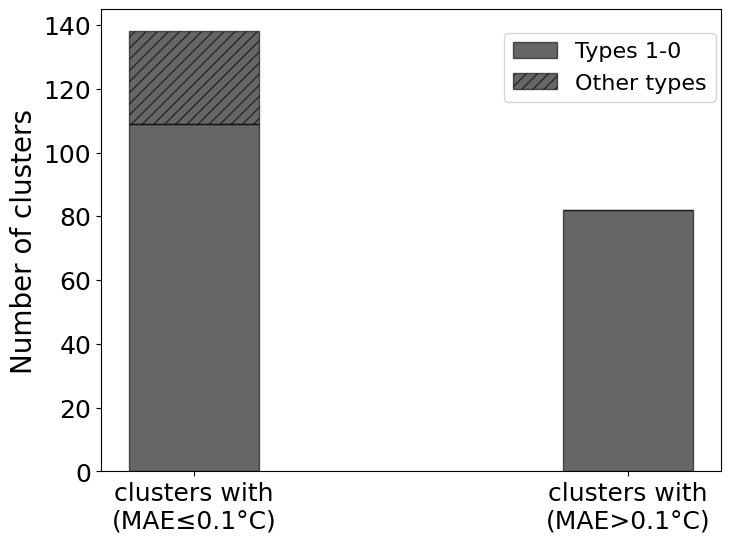

In [71]:
# Relevance clusters, bar plot

import seaborn as sns

df_to_plot = best_rnns_version_1_pd.copy()
df_to_plot['good'] = df_to_plot['mae'].apply(lambda x: x < 0.1)
df_to_plot['is_1_0'] = df_to_plot['cluster type'].apply(lambda x: x == '1-0')
df_to_plot = df_to_plot.sort_values(by=['is_1_0'])

fig, ax = plt.subplots(figsize=(8,6))
# ax = sns.countplot(df_to_plot.sort_values(by='cluster type'), x='good', hue='is_1_0', ax=ax, palette='colorblind')

df_to_plot_relevant = df_to_plot[df_to_plot['good'] == True]
df_to_plot_relevant_no_1_0 = df_to_plot_relevant[(df_to_plot_relevant['is_1_0'] == False)]
df_to_plot_relevant_1_0 = df_to_plot_relevant[(df_to_plot_relevant['is_1_0'] == True)]

nb_1_0 = len(df_to_plot_relevant_1_0)
nb_no_1_0 = len(df_to_plot_relevant_no_1_0)
ax.bar([0], [nb_no_1_0], width=0.6, edgecolor='black', color='black', alpha=0.6)
ax.bar([0], [nb_1_0], width=0.6, bottom=nb_no_1_0, edgecolor='black',  hatch="///", color='black', alpha=0.6)

df_to_plot_notrelevant = df_to_plot[df_to_plot['good'] == False]
df_to_plot_notrelevant_no_1_0 = df_to_plot_notrelevant[(df_to_plot_notrelevant['is_1_0'] == False)]
df_to_plot_notrelevant_1_0 = df_to_plot_notrelevant[(df_to_plot_notrelevant['is_1_0'] == True)]

nb_1_0 = len(df_to_plot_notrelevant_1_0)
nb_no_1_0 = len(df_to_plot_notrelevant_no_1_0)
ax.bar([2], [nb_no_1_0], width=0.6, edgecolor='black', color='black', alpha=0.6,)
ax.bar([2], [nb_1_0], width=0.6, bottom=nb_no_1_0, edgecolor='black',  hatch="///", color='black', alpha=0.6)


# for i in ax.containers:
#     ax.bar_label(i,)
    
set_my_layout(ax=ax, xlabel='', ylabel='Number of clusters')

ax.legend(["Types 1-0", "Other types"], prop={'size': 16}, loc=[0.65,0.8])

ax.set_xticks([0,2])
ax.set_xticklabels(["clusters with\n(MAE≤0.1°C)", "clusters with\n(MAE>0.1°C)"])
plt.savefig(os.path.join('.', 'ARTICLE_images_plots','distribution_adequate_inadequate.svg'))
plt.show()

We investigate the presence of potential overfitted clusters. Such clusters will highlight very low train loss but high MAE on test sets. High train loss and high MAE on test sets are considered irrelevant clusters (i.e. too complex physics).

To identify such overfitting behaviors, we consider a linear regression between train loss and test MAE, they must be correlated, and find outliers. 

In [125]:
# Trial to identify overfittings

df_mae_loss_only = df_to_plot.copy() # Above 0.1°C we consider underfitting or hard physic to be learn
# Detecting outliers on MAE-Test and train last epoch loss
# Create Linear Regression slope
df_mae_loss_only['y/x'] = df_mae_loss_only['mae'] / df_mae_loss_only['best_loss']

# We compute the Q1 and Q3 and Interquartile range
q1 = df_mae_loss_only['y/x'].quantile(0.25)  #25th quartile
q3 = df_mae_loss_only['y/x'].quantile(0.75)  #75th quartile
iqr = q3 - q1

# Outliers behaviors == potential overfittings
# Clusters outside the bounds
lower_bound = q1-1.5*iqr
upper_bound = q3+1.5*iqr

potential_overfitted = df_mae_loss_only[(df_mae_loss_only['y/x']<lower_bound) & (df_mae_loss_only['y/x']>upper_bound)]
potential_overfitted.head()

# Loss train vs MAE train distributions 
fig, axes = plt.subplots(figsize=(8,6), nrows=2, sharex=True)
fig.tight_layout(pad=0.4)
sns.scatterplot(best_rnns_version_1_pd, x='best_loss', y='mae', ax=axes[0])
sns.scatterplot(best_cnns_version_2_pd, x='best_loss', y='mae', ax=axes[0])


set_my_layout(axes[0], xlabel='', ylabel='MAE(°C) on test',  legends=['RNN v1'
                                                                      'CNN v2'])

sns.kdeplot(best_rnns_version_1_pd, x='best_loss', ax=axes[1])
sns.kdeplot(best_cnns_version_2_pd, x='best_loss', ax=axes[1])

set_my_layout(axes[1], xlabel='Last epoch loss on validation', ylabel='Density',  legends=['RNN v1',
                                                                                           'CNN v2'],
              withlegend=True,
              legend_loc=[0.6,0.6])

plt.show()

,version,Regularizer,cluster key,cluster set,cluster dhn,cluster nodes,cluster size,cluster type,cut ratio,is inverted flux,ML input features,ML output features,mae,best_loss,good,is_1_0,y/x


## Selected clusters

We show the distribution of the selected clusters from the 4 different case study networks and group them by their respective sizes (number of nodes) and types (external connectivity).

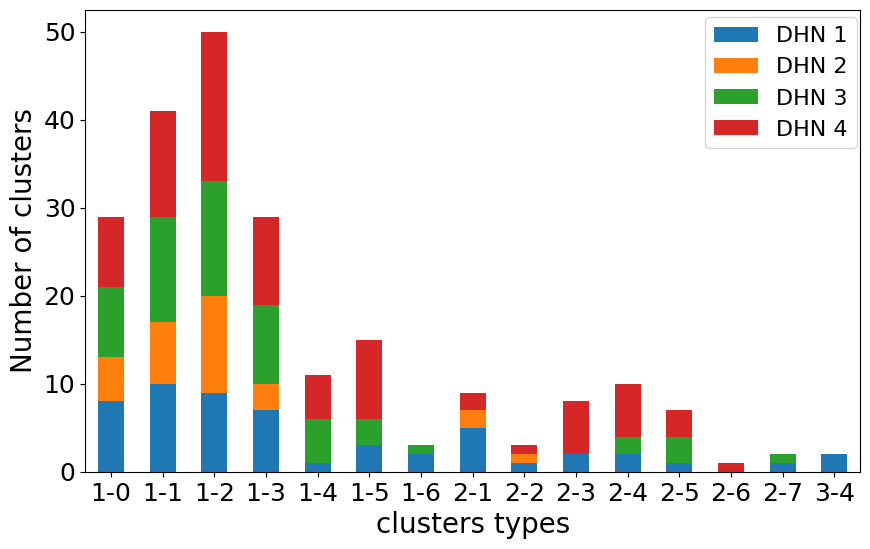

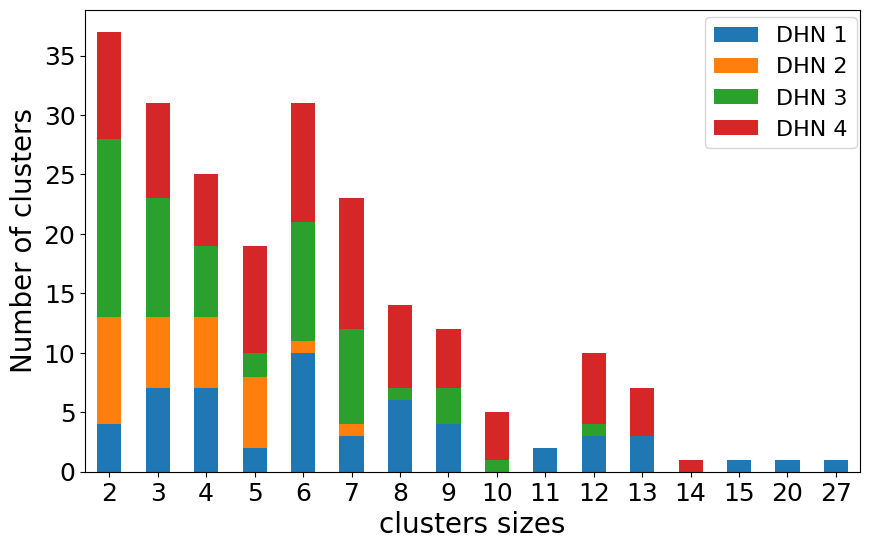

In [127]:
# Bar plots of selected clusters
import seaborn as sns 
fig, ax = plt.subplots(figsize=(10,6))
df_plot = best_rnns_version_1_pd.groupby(['cluster dhn', 'cluster type']).size().reset_index().pivot(columns='cluster dhn', index='cluster type', values=0)
df_plot.plot(kind='bar', stacked=True, ax=ax)
set_my_layout(ax=ax, xlabel='clusters types', ylabel='Number of clusters',
              withlegend=True,
              legends=['DHN 1', 'DHN 2', 'DHN 3', 'DHN 4'],
              legend_loc=[0.8,0.7])
plt.xticks(rotation=0)
plt.savefig(os.path.join('.', 'ARTICLE_images_plots','distribution_clusters_types.svg'))
plt.show()

fig, ax = plt.subplots(figsize=(10,6))
df_plot = best_rnns_version_1_pd.groupby(['cluster dhn', 'cluster size']).size().reset_index().pivot(columns='cluster dhn', index='cluster size', values=0)
df_plot.plot(kind='bar', stacked=True, ax=ax)
set_my_layout(ax=ax, xlabel='clusters sizes', ylabel='Number of clusters',
              withlegend=True,
              legends=['DHN 1', 'DHN 2', 'DHN 3', 'DHN 4'],
              legend_loc=[0.8,0.7])


plt.xticks(rotation=0)
plt.savefig(os.path.join('.', 'ARTICLE_images_plots','distribution_clusters_sizes.svg'))
plt.show()